[1 Проект: Линейные модели в машинном обучении. Описание проекта](#title1)

[2 Библиотеки](#title2)

[3 Загрузка данных](#title3)

[4 Предобработка данных](#title4)

[5 Исследовательский анализ данных](#title5)

[6 Корреляционный анализ](#title6)

[7 Обучение модели линейной регрессии](#title7)

[8 Обучение модели логистической регрессии](#title8)

[9 Итоговые выводы](#title9)

## <a id="title1">Проект: Линейные модели в машинном обучении. Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## <a id="title2">Библиотеки

In [1]:
# код ревьюера
!pip install -U scikit-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from scipy import stats as st
from statistics import variance


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             accuracy_score, precision_score,
                            recall_score,f1_score, r2_score, confusion_matrix,
                            roc_curve, auc)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from pickle import dump, load

In [4]:
!pip install imbalanced-learn

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
!pip install catboost

In [7]:
from catboost import CatBoostClassifier, CatBoostRegressor

## <a id="title3">Загрузка данных

In [8]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv',  sep=';', decimal=',')
except:
    ferma_main = pd.read_csv(r"C:\Users\Aleksandr\Downloads\ferma_main.csv",  sep=';', decimal=',')

print('Датасет ferma_main размером:', ferma_main.shape)

Датасет ferma_main размером: (634, 12)


In [9]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv',  sep=';', decimal=',')
except:
    ferma_dad = pd.read_csv(r"C:\Users\Aleksandr\Downloads\ferma_dad.csv",  sep=';',decimal=',')

print('Датасет ferma_dad размером:', ferma_dad.shape)

Датасет ferma_dad размером: (629, 2)


In [10]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv',  sep=';', decimal=',')
except:
    cow_buy = pd.read_csv(r"C:\Users\Aleksandr\Downloads\cow_buy.csv",  sep=';', decimal=',')

print('Датасет cow_buy размером:', cow_buy.shape)

Датасет cow_buy размером: (20, 7)


In [11]:
cow_buy.head(5)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [12]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [13]:
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
"Текущая_жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"Текущий_уровень_белок,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


In [14]:
ferma_dad.head(5)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [15]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [16]:
ferma_dad.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


In [17]:
ferma_main.head(5)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [18]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [19]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,634.0,317.460568,183.096982,1.000,159.250,317.500,475.750,629.000
"Удой, кг",634.0,6187.025237,1638.401021,5204.000,5751.750,6130.500,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),634.0,14.542744,1.301301,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",634.0,1922.682965,182.392548,1660.000,1772.250,1880.500,2058.750,2349.000
СПО (Сахаро-протеиновое соотношение),634.0,0.912855,0.032209,0.840,0.890,0.930,0.940,0.960
"Жирность,%",634.0,3.603943,0.168020,2.990,3.590,3.650,3.720,3.750
"Белок,%",634.0,3.075666,0.002540,3.069,3.074,3.076,3.077,3.085


Посмотрев на информацию в датасетах, мы видим, целевые признаки (удой коровы, Вкус молока), а также признаки, которые прямо или косвенно их характеризуют. 
Количество столбцов соответствует заявленному в ТЗ, в описании .

##  <a id="title4">Предобработка данных

In [20]:
ferma_main.rename(columns={
    'Удой, кг': 'удой',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'сырой_протеин',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Жирность,%': 'жирность',
    'Белок,%': 'белок',
    'Вкус молока': 'вкус_молока',
    'Возраст': 'возраст',
}, inplace=True)

In [21]:
ferma_dad.rename(columns={'Имя Папы': 'имя_папы'}, inplace=True)

In [22]:
cow_buy.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'жирность',
    'Текущий_уровень_белок,%': 'белок',
    'Возраст': 'возраст'
}, inplace=True)

In [23]:
print('Колонки ferma_main:',ferma_main.columns)
print('Колонки ferma_dad:', ferma_dad.columns)
print('Колонки cow_buy:',cow_buy.columns)

Колонки ferma_main: Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')
Колонки ferma_dad: Index(['id', 'имя_папы'], dtype='object')
Колонки cow_buy: Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')


In [24]:
print('Пропуски в значениях:')
print()
print('Датафрейм ferma_main')
display(ferma_main.isna().sum())
print()
print('Датафрейм ferma_dad')
display(ferma_dad.isna().sum())
print()
print('Датафрейм cow_buy')
display(cow_buy.isna().sum())

Пропуски в значениях:

Датафрейм ferma_main


id               0
удой             0
эке              0
сырой_протеин    0
спо              0
порода           0
тип_пастбища     0
порода_папы      0
жирность         0
белок            0
вкус_молока      0
возраст          0
dtype: int64


Датафрейм ferma_dad


id          0
имя_папы    0
dtype: int64


Датафрейм cow_buy


порода          0
тип_пастбища    0
порода_папы     0
имя_папы        0
жирность        0
белок           0
возраст         0
dtype: int64

Сравним похожие колонки, посмотрим различия. 

In [25]:
print('Колонки ferma_main:',ferma_main.columns)
print('Колонки ferma_dad:', ferma_dad.columns)
print('Колонки cow_buy:',cow_buy.columns)

Колонки ferma_main: Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')
Колонки ferma_dad: Index(['id', 'имя_папы'], dtype='object')
Колонки cow_buy: Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')


Общее: Порода, Тип пастбища, порода папы_быка. Посмотрим на остальные как гипотиза: Жирность,%(ferma_main) = Текущая_жирность,% и.т.д.

In [26]:
ferma_main['порода'].value_counts()

порода
Вис Бик Айдиал     373
РефлешнСоверинг    261
Name: count, dtype: int64

In [27]:
cow_buy['порода'].value_counts()

порода
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: count, dtype: int64

In [28]:
cow_buy['порода_папы'].value_counts()

порода_папы
Соверин    12
Айдиал      8
Name: count, dtype: int64

In [29]:
ferma_main['порода_папы'].value_counts()

порода_папы
Соверин    316
Айдиал     240
Айдиалл     78
Name: count, dtype: int64

In [30]:
ferma_main['порода_папы'].replace({'Айдиалл': 'Айдиал'}, inplace=True)
ferma_main['порода_папы'].value_counts()

порода_папы
Айдиал     318
Соверин    316
Name: count, dtype: int64

In [31]:
print(ferma_main['тип_пастбища'].unique())
print(cow_buy['тип_пастбища'].unique())

['Равнинное' 'Равнинные' 'Холмистое']
['холмистое' 'равнинное']


In [32]:
ferma_main['тип_пастбища'].replace({'Равнинные': 'Равнинное'}, inplace=True)
cow_buy['тип_пастбища'].replace({'холмистое': 'Холмистое', 'равнинное': 'Равнинное'}, inplace=True)

print(ferma_main['тип_пастбища'].unique())
print(cow_buy['тип_пастбища'].unique())

['Равнинное' 'Холмистое']
['Холмистое' 'Равнинное']


In [33]:
print(f'Кол-во дубликатов до удаления в датасете ferma_main: {ferma_main.duplicated().sum()}')
ferma_main.drop_duplicates(inplace=True)
print(f'Кол-во дубликатов после удаления в датасете ferma_main: {ferma_main.duplicated().sum()}')

print(f'Кол-во дубликатов до удаления в датасете ferma_dad: {ferma_dad.duplicated().sum()}')
ferma_dad.drop_duplicates(inplace=True)
print(f'Кол-во дубликатов после удаления в датасете ferma_main: {ferma_dad.duplicated().sum()}')

print(f'Кол-во дубликатов до удаления в датасете cow_buy: {cow_buy.duplicated().sum()}')
cow_buy.drop_duplicates(inplace=True)
print(f'Кол-во дубликатов после удаления в датасете cow_buy: {cow_buy.duplicated().sum()}')

print(f'Проверка размерности ferma_main ={ferma_main.shape}, ferma_dad = {ferma_dad.shape}, cow_buy = {cow_buy.shape}')

Кол-во дубликатов до удаления в датасете ferma_main: 5
Кол-во дубликатов после удаления в датасете ferma_main: 0
Кол-во дубликатов до удаления в датасете ferma_dad: 0
Кол-во дубликатов после удаления в датасете ferma_main: 0
Кол-во дубликатов до удаления в датасете cow_buy: 4
Кол-во дубликатов после удаления в датасете cow_buy: 0
Проверка размерности ferma_main =(629, 12), ferma_dad = (629, 2), cow_buy = (16, 7)


**Вывод:**
- найдены несостыковки
- убраны дубликаты
- убраны некорректные заполнения  

## <a id="title5">Исследовательский анализ данных

In [34]:
print(f'Проверка размерности ferma_main ={ferma_main.shape}, ferma_dad = {ferma_dad.shape}, cow_buy = {cow_buy.shape}')

Проверка размерности ferma_main =(629, 12), ferma_dad = (629, 2), cow_buy = (16, 7)


16     45616
70      7222
135     7207
296     7201
294     7197
Name: удой, dtype: int64

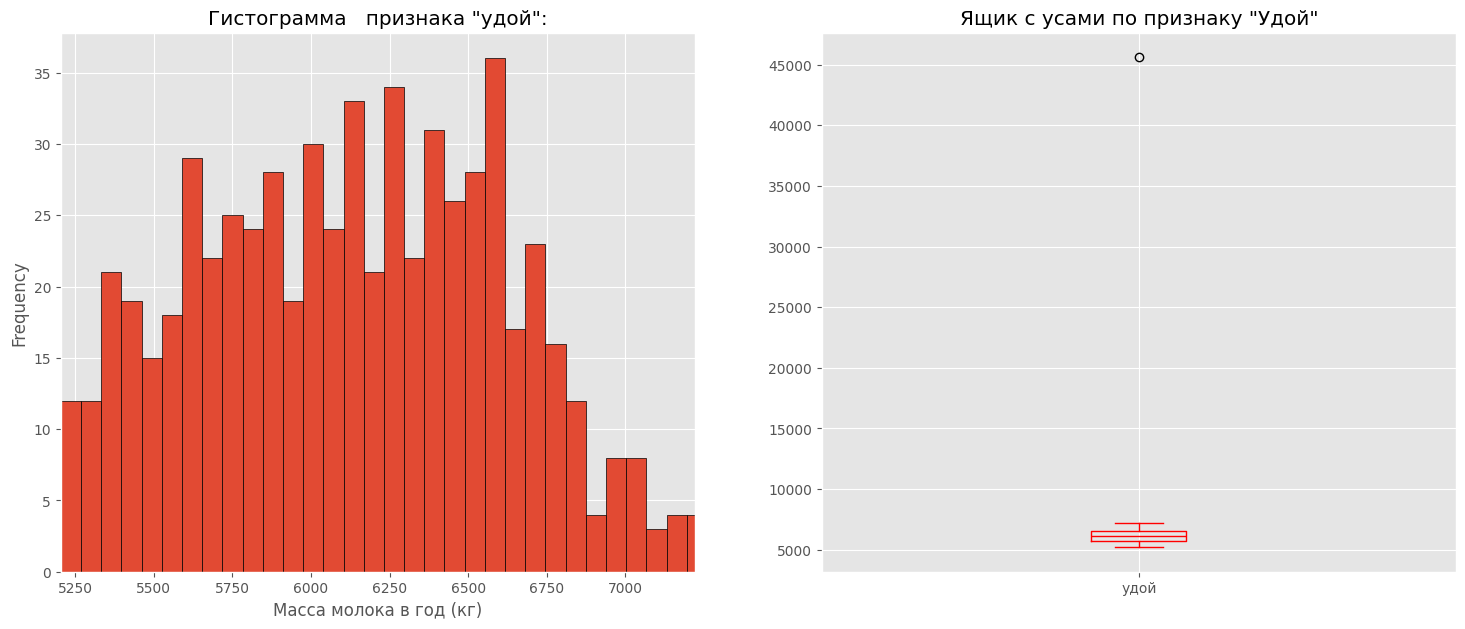

In [35]:
display(ferma_main['удой'].sort_values(ascending=False).head())
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main['удой'].plot(kind='hist',
                        ax=axis[0],
                        bins=629,
                        xlim = (5204, 7222),
                        xlabel = 'Масса молока в год (кг)',
                        title = 'Гистограмма   признака "удой":',
                        ec='black')

ferma_main['удой'].plot(kind='box',
                        ax=axis[1],
                        x=ferma_main['удой'],
                        color='r',
                        title = 'Ящик с усами по признаку "Удой"')
plt.show()


- Выброс значения удоя ~45 тонн. Удостоверимся

In [36]:
display(ferma_main[ferma_main['удой'] > 45000])
ferma_main = ferma_main.query('удой != 45616')
print('Новые данные:')
ferma_main['удой'].sort_values(ascending=False).head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Новые данные:


70     7222
135    7207
296    7201
294    7197
593    7174
Name: удой, dtype: int64

In [37]:
print(f'Проверка размерности ferma_main ={ferma_main.shape}, ferma_dad = {ferma_dad.shape}, cow_buy = {cow_buy.shape}')

Проверка размерности ferma_main =(628, 12), ferma_dad = (629, 2), cow_buy = (16, 7)


352    16.8
70     16.8
282    16.8
584    16.7
232    16.7
Name: эке, dtype: float64

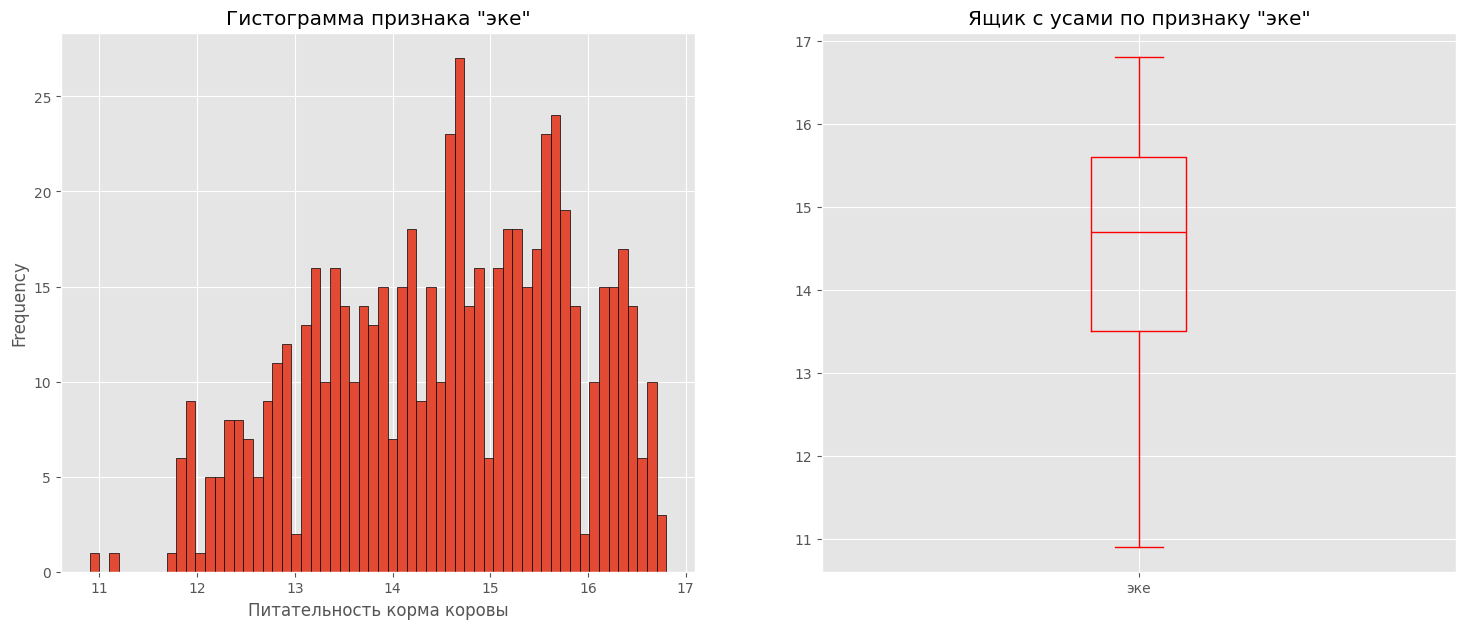

In [38]:
display(ferma_main['эке'].sort_values(ascending=False).head())
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main['эке'].plot(kind='hist',
                        ax=axis[0],
                        bins=60,
                        xlabel = 'Питательность корма коровы',
                        title = 'Гистограмма признака "эке"',
                        ec='black')

ferma_main['эке'].plot(kind='box',
                        ax=axis[1],
                        x=ferma_main['эке'],
                        color='r',
                        title = 'Ящик с усами по признаку "эке"')
plt.show()

- распределение без аномалий

423    2349
497    2346
135    2343
472    2341
235    2341
Name: сырой_протеин, dtype: int64

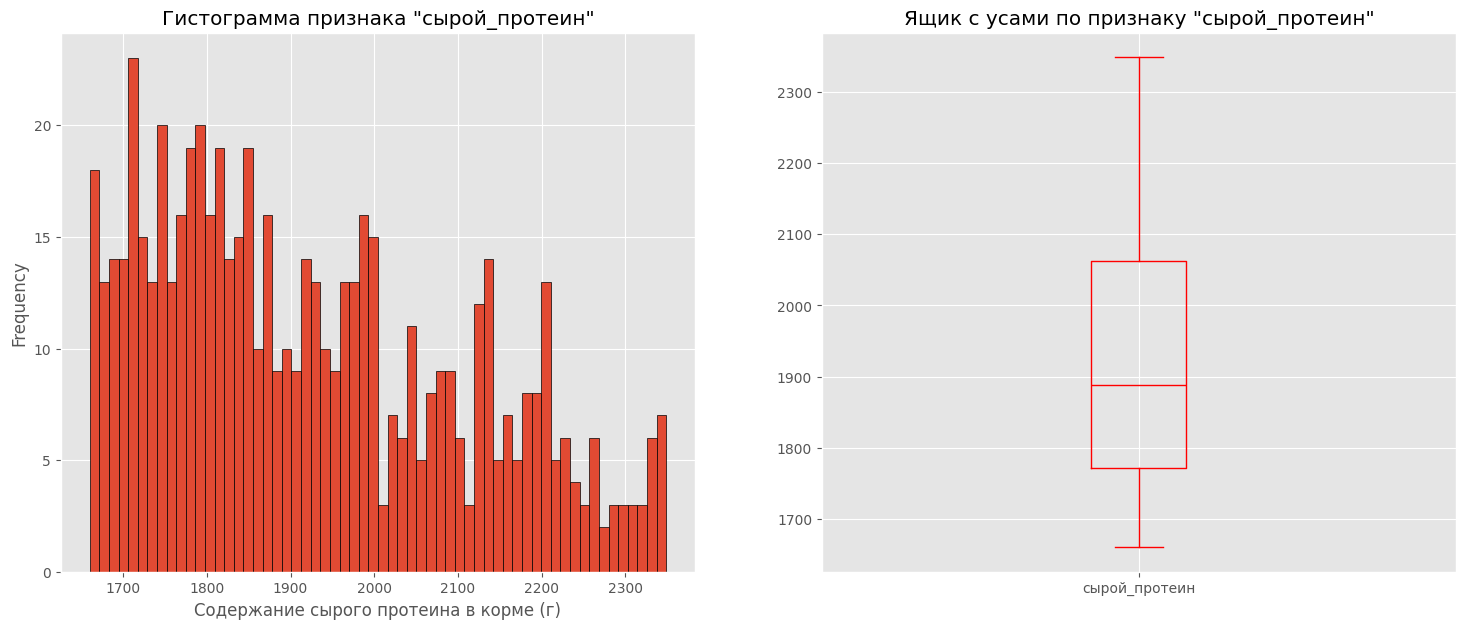

In [39]:
display(ferma_main['сырой_протеин'].sort_values(ascending=False).head())
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main['сырой_протеин'].plot(kind='hist',
                                ax=axis[0],
                                bins=60,
                                xlabel = 'Содержание сырого протеина в корме (г)',
                                title = 'Гистограмма признака "сырой_протеин"',
                                ec='black')

ferma_main['сырой_протеин'].plot(kind='box',
                                ax=axis[1],
                                x=ferma_main['сырой_протеин'],
                                color='r',
                                title = 'Ящик с усами по признаку "сырой_протеин"')
plt.show()

- Существует асимметрия в левую сторону

620    0.96
190    0.96
44     0.96
422    0.95
563    0.95
Name: спо, dtype: float64

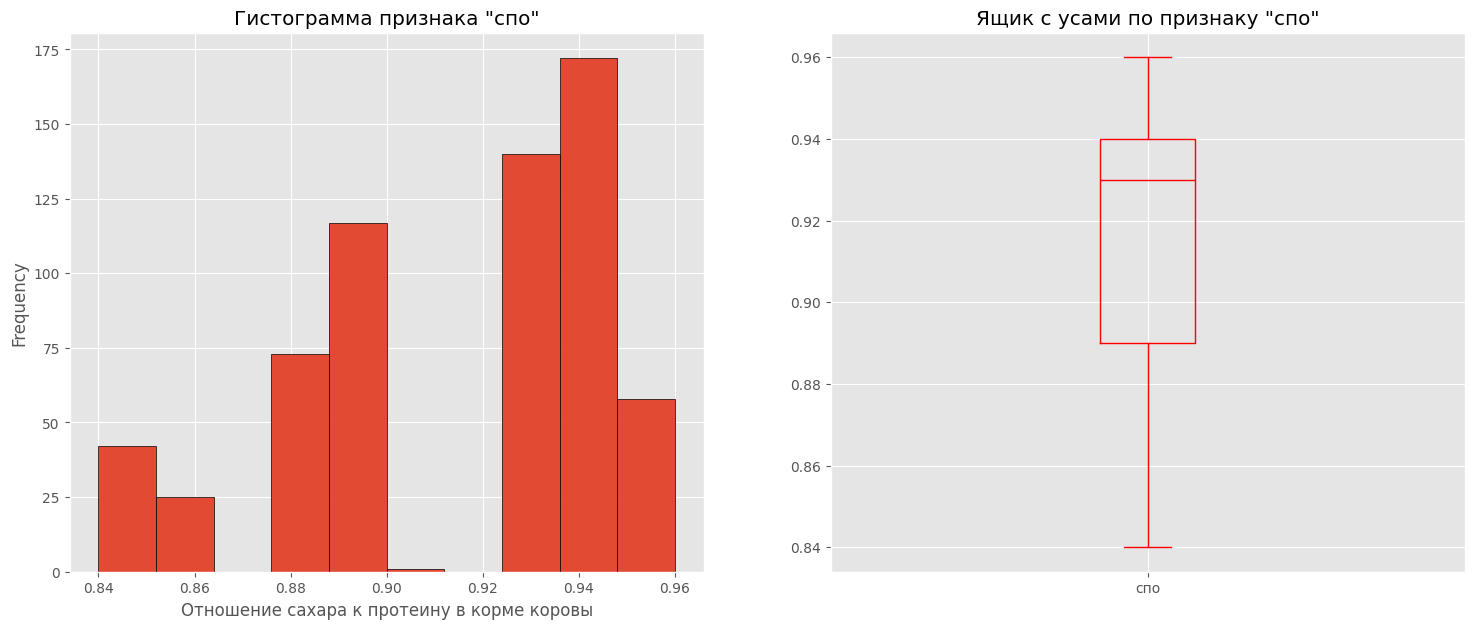

In [40]:
display(ferma_main['спо'].sort_values(ascending=False).head())
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main['спо'].plot(kind='hist',
                        ax=axis[0],
                        bins=10,
                        xlabel = 'Отношение сахара к протеину в корме коровы',
                        title = 'Гистограмма признака "спо"',
                        ec='black')

ferma_main['спо'].plot(kind='box',
                        ax=axis[1],
                        x=ferma_main['спо'],
                        color='r',
                        title = 'Ящик с усами по признаку "спо"')
plt.show()

- Существует асимметрия в левую сторону, в целом данные нормальные

204    3.75
181    3.74
298    3.74
249    3.74
338    3.74
Name: жирность, dtype: float64

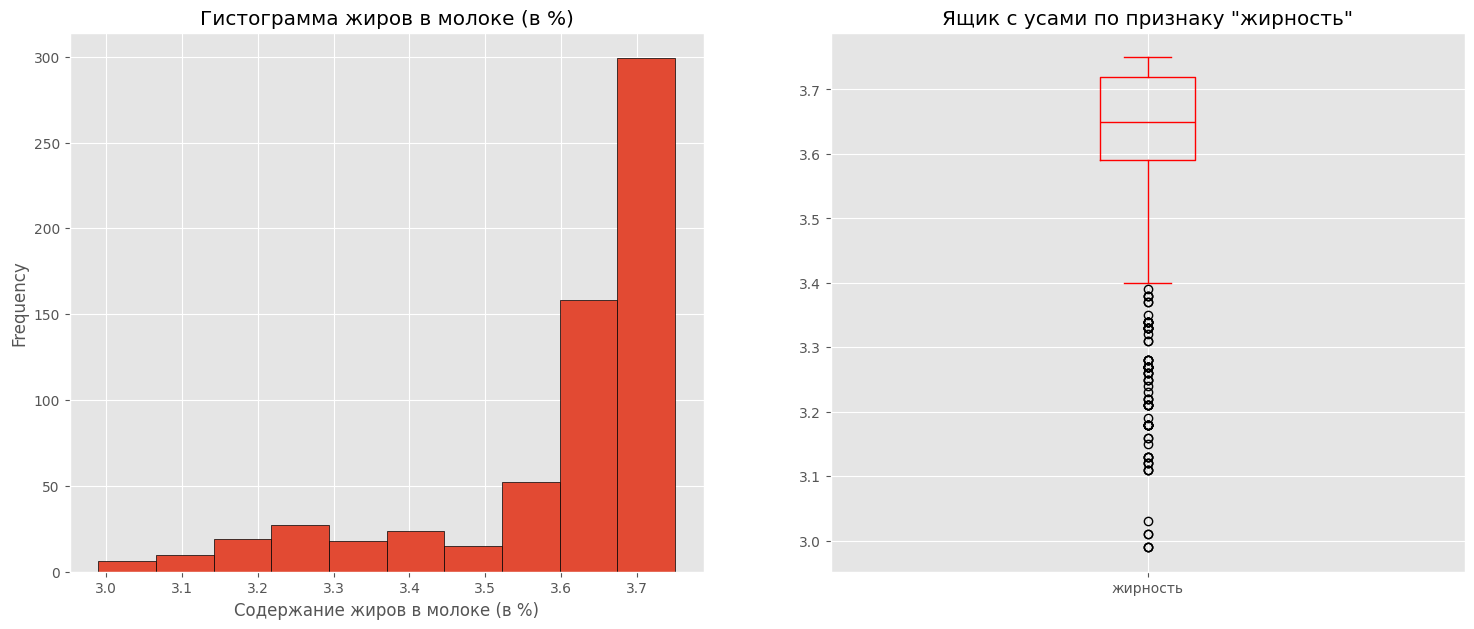

In [41]:
display(ferma_main['жирность'].sort_values(ascending=False).head())
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main['жирность'].plot(kind='hist',
                            ax=axis[0],
                            bins=10,
                            xlabel = 'Cодержание жиров в молоке (в %)',
                            title = 'Гистограмма жиров в молоке (в %)',
                            ec='black')

ferma_main['жирность'].plot(kind='box',
                            ax=axis[1],
                            x=ferma_main['жирность'],
                            color='r',
                            title = 'Ящик с усами по признаку "жирность"')
plt.show()

- Есть отличия

In [42]:
ferma_main.query("жирность < 3.4")

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет
10,11,5591,13.7,1678,0.895,РефлешнСоверинг,Холмистое,Айдиал,3.13,3.075,вкусно,менее_2_лет
17,18,5777,12.4,1873,0.895,Вис Бик Айдиал,Холмистое,Айдиал,3.03,3.080,вкусно,более_2_лет
24,25,5372,13.2,1703,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.31,3.078,не вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,5610,14.7,1671,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.18,3.079,не вкусно,более_2_лет
589,590,5213,12.1,2016,0.880,РефлешнСоверинг,Равнинное,Соверин,3.19,3.076,не вкусно,менее_2_лет
591,592,5520,11.9,1785,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.12,3.073,не вкусно,менее_2_лет
602,603,5594,12.3,1742,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.11,3.077,вкусно,менее_2_лет


- Кажется, что это просто молоко с малой долей жирности, по сколько значений много, оставляю как есть

In [43]:
print(f'Проверка размерности ferma_main ={ferma_main.shape}, ferma_dad = {ferma_dad.shape}, cow_buy = {cow_buy.shape}')

Проверка размерности ferma_main =(628, 12), ferma_dad = (629, 2), cow_buy = (16, 7)


517    3.085
471    3.085
426    3.082
77     3.082
178    3.081
Name: белок, dtype: float64

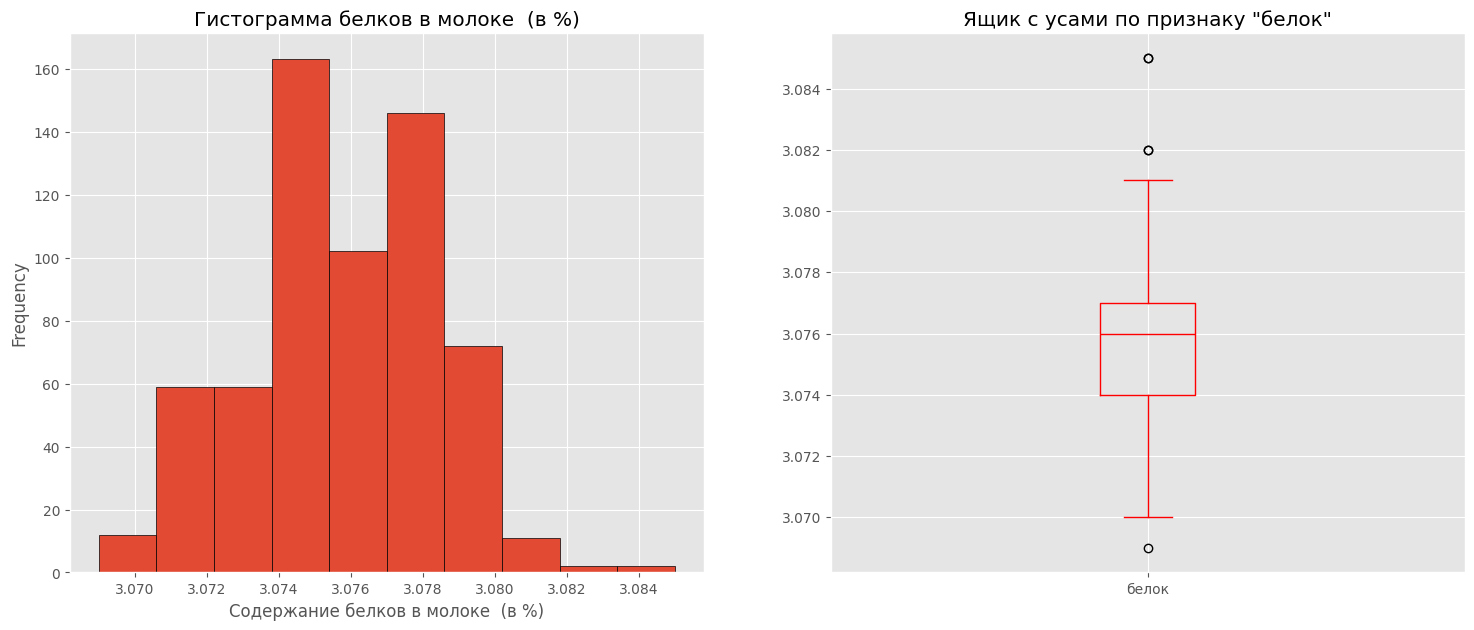

In [44]:
display(ferma_main['белок'].sort_values(ascending=False).head())
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main['белок'].plot(kind='hist',
                        ax=axis[0],
                        bins=10,
                        xlabel = 'Cодержание белков в молоке  (в %)',
                        title = 'Гистограмма белков в молоке  (в %)',
                        ec='black')

ferma_main['белок'].plot(kind='box',
                        ax=axis[1],
                        x=ferma_main['белок'],
                        color='r',
                        title = 'Ящик с усами по признаку "белок"')
plt.show()

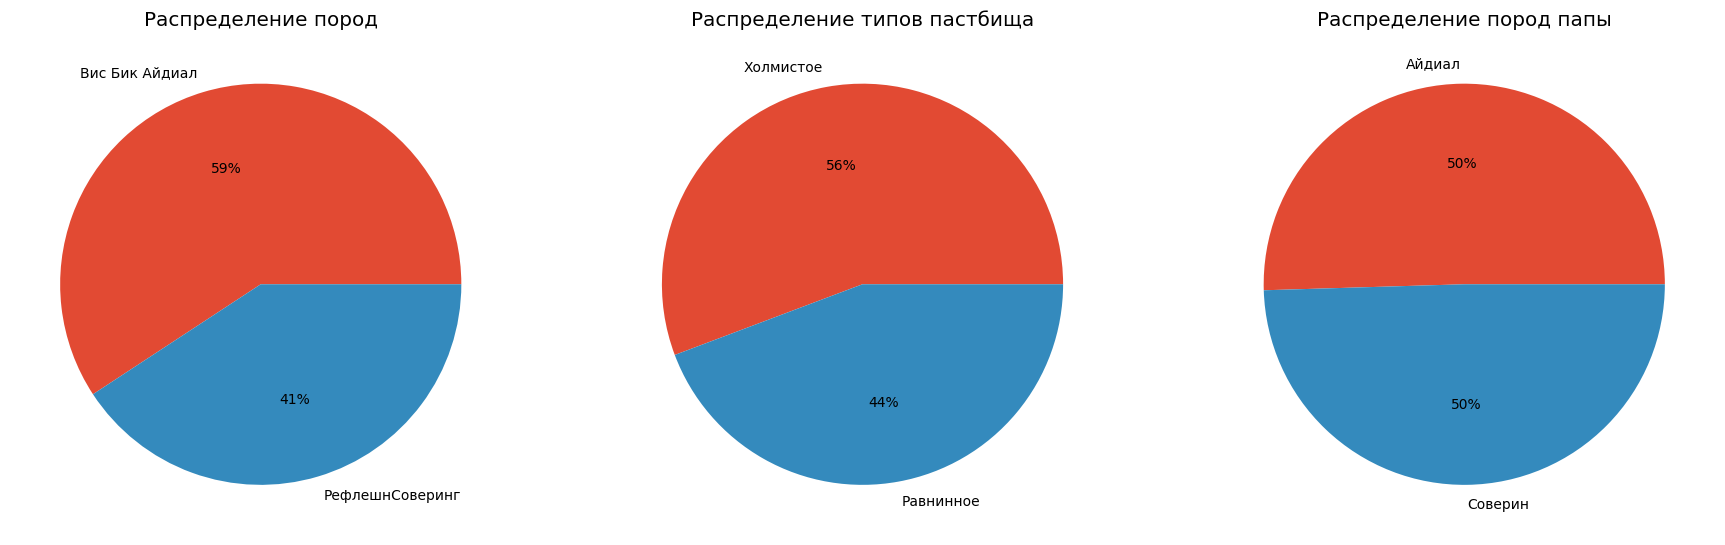

In [45]:
fig, axis = plt.subplots(1,3, figsize=(22,9))
ferma_main['порода'].value_counts().plot.pie(title = 'Распределение пород',
                                             ax=axis[0],
                                             ylabel ='',
                                             legend = '',
                                             autopct='%1.0f%%');
ferma_main['тип_пастбища'].value_counts().plot.pie(title = 'Распределение типов пастбища',
                                                 ax=axis[1],
                                                 ylabel ='',
                                                 legend ='',
                                                 autopct='%1.0f%%');
ferma_main['порода_папы'].value_counts().plot.pie(title = 'Распределение пород папы',
                                                 ax=axis[2],
                                                 ylabel ='',
                                                 legend ='',
                                                 autopct='%1.0f%%');
plt.show()


- Распределение почти 50 на 50 

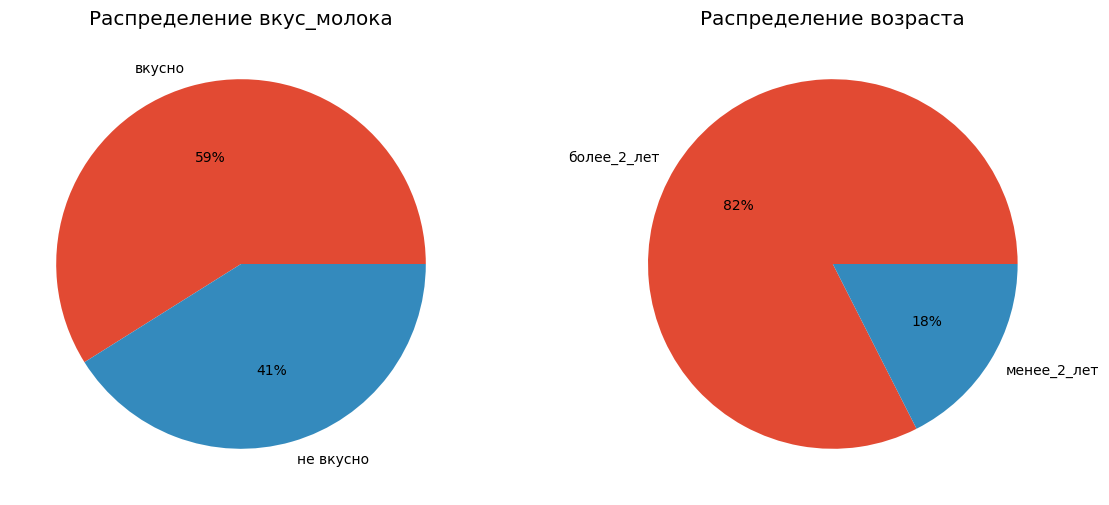

In [46]:
fig, axis = plt.subplots(1,2, figsize=(14,6))
ferma_main['вкус_молока'].value_counts().plot.pie(title = 'Распределение вкус_молока',
                                             ax=axis[0],
                                             ylabel ='',
                                             legend = '',
                                             autopct='%1.0f%%');
ferma_main['возраст'].value_counts().plot.pie(title = 'Распределение возраста',
                                                 ax=axis[1],
                                                 ylabel ='',
                                                 legend ='',
                                                 autopct='%1.0f%%');
plt.show()

- Выявлено несколько аномальных значений
- Просмотрены числовые и категориальные признаки 
- ferma_main['жирность'], ferma_main['спо'], ferma_main['сырой_протеин'],ferma_main['эке'] дополнительно добавлю np.log1p, np.logp для сглаживания 

## <a id="title6">Корреляционный анализ

<Figure size 800x640 with 0 Axes>

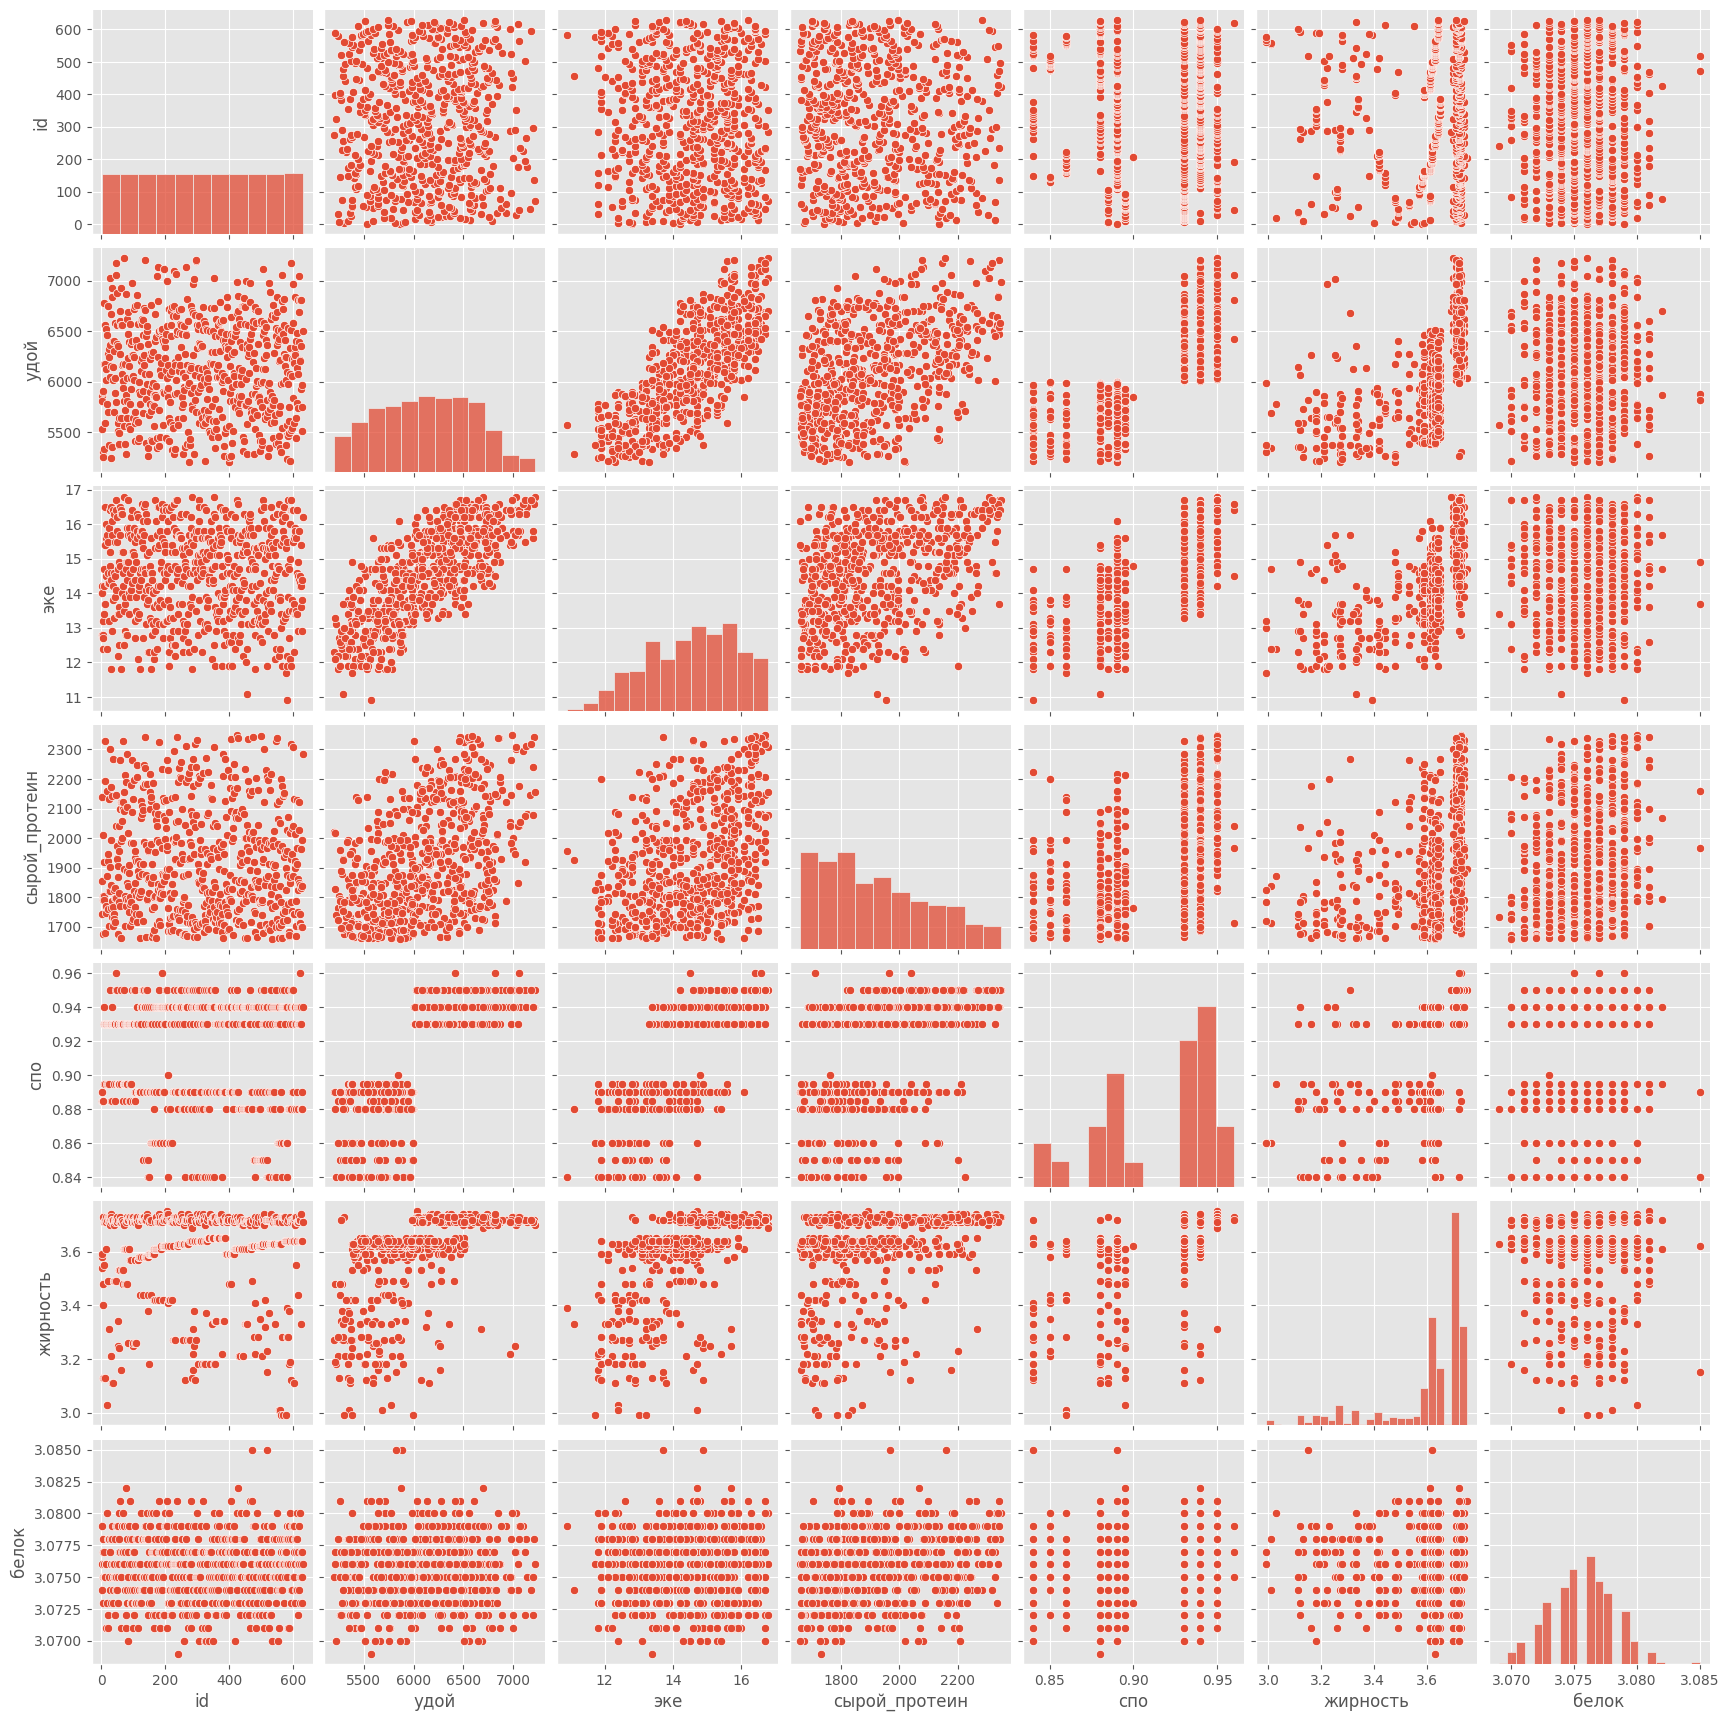

In [47]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(ferma_main.select_dtypes(include=[np.number]),
              kind="scatter")
plt.show()

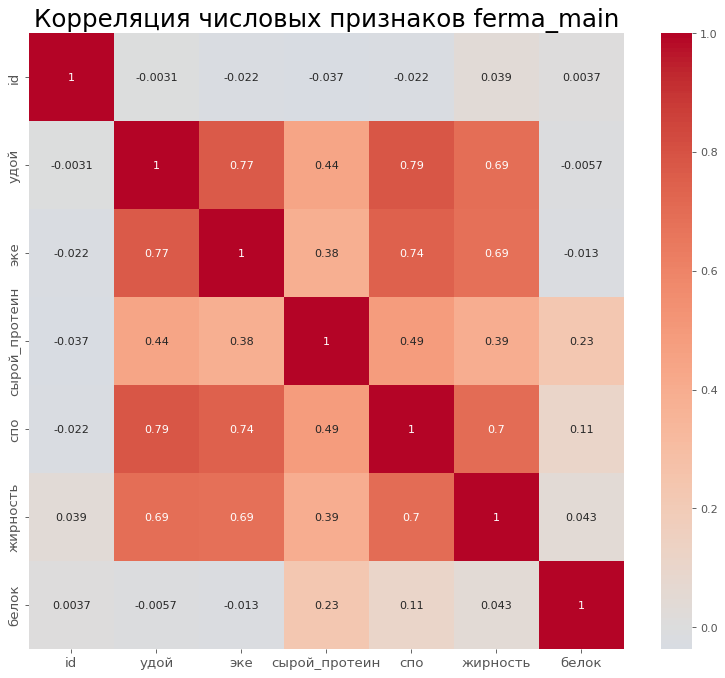

In [48]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(ferma_main.select_dtypes(include=[np.number]).corr('spearman'),
            xticklabels=ferma_main.select_dtypes(include=[np.number]).corr().columns,
            yticklabels=ferma_main.select_dtypes(include=[np.number]).corr().columns, 
            cmap='coolwarm', center=0, annot=True)

# Decorations
plt.title('Корреляция числовых признаков ferma_main', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [49]:
scatter_list = ferma_main.select_dtypes(include=[np.number]).columns
scatter_list[2:]

Index(['эке', 'сырой_протеин', 'спо', 'жирность', 'белок'], dtype='object')

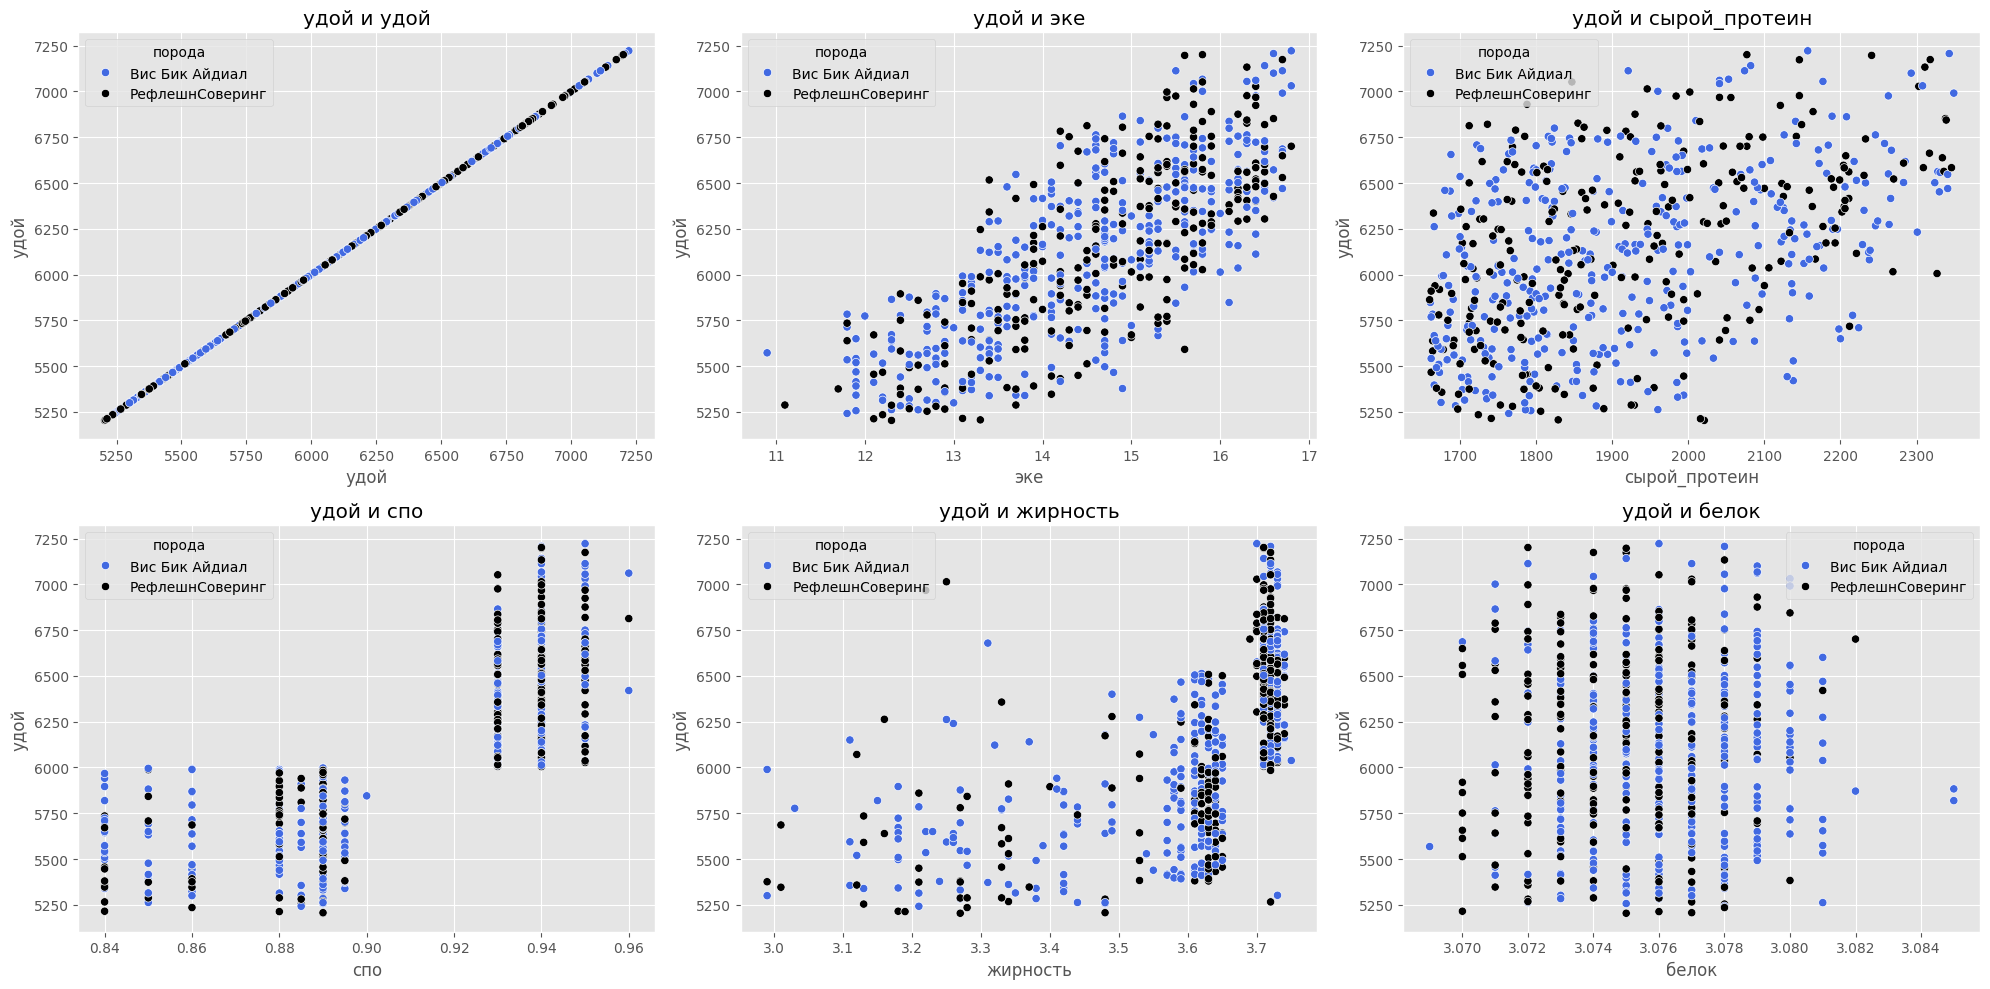

In [50]:
plt.figure(figsize=(20, 10))

for i, j in enumerate(scatter_list[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=ferma_main, x=j, y='удой', hue='порода', palette=['royalblue', 'black'])
    plt.title(f'удой и {j}')

plt.tight_layout()
plt.show()

Целевой признак удой:

- линейная связь наблюдается у сырой протеин
- нелинейная связь у: эке, спо, жирность, белок
- сильная корреляция наблюдается у: эке, спо, возраст
- умеренная корреляция у сырой протеин, порода папы
- слабая корреляция наблюдается у жирность, белок, порода, тип пастбища

Корреляция:
- белок - Связь нелинейная. 

- возраст - имеет сильнейшую взаимосвязь с целевым признаком. Коэффициент взаимосвязи: 1.00

- эке - положительная взаимосвязь выше умеренного значения. С увеличением "удоя" постепенно увеличивается и эке. 

- сырой_протеин - на графике виден довольно большой разброс значений, однако наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная. 

- спо - высокий коэффициент корреляции. Связь не нелинейная, но есть спорный момент с переходом в значении спо == 0.91 

- жирность  умеренно положительная зависимость. 

In [51]:
z, G = dmatrices('удой ~ эке+сырой_протеин+спо+жирность+белок', data=ferma_main.drop(columns = ['id']), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(G.values, i) for i in range(G.shape[1])]
vif['variable'] = G.columns
vif

,VIF,variable
0,1.565940e+06,Intercept
1,2.570253e+00,эке
2,1.342839e+00,сырой_протеин
3,2.646003e+00,спо
4,1.875846e+00,жирность
5,1.079267e+00,белок


- интропретируем,все так или иначе имеют умеренную корреляцию между данной объясняющей переменной и другими независимыми переменными в модели, но часто она недостаточно серьезна, чтобы требовать внимания.

##  <a id="title7">Обучение модели линейной регрессии

In [52]:
ferma_main_copy = ferma_main.copy(deep=True)
print(f'Проверка размерности ferma_main ={ferma_main.shape}, ferma_main_copy = {ferma_main_copy.shape}')

Проверка размерности ferma_main =(628, 12), ferma_main_copy = (628, 12)


In [53]:
columns_reper = ferma_main_copy.columns
columns_reper

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [54]:
X = ferma_main_copy.drop(columns = ['удой', 'id'])
y = ferma_main_copy['удой']
print(f'Проверка размерности X ={X.shape}, y = {y.shape}')

Проверка размерности X =(628, 10), y = (628,)


In [55]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 10)
(157, 10)
(471,)
(157,)


In [56]:
def preprocess_df(X, Y, list_col, list_num):
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    cat_col_names = list_col
    print('Категориальные признаки', cat_col_names)
    encoder.fit(X[cat_col_names])
    X_train_ohe = encoder.fit_transform(X[cat_col_names])
    Y_test_ohe = encoder.transform(Y[cat_col_names])
    encoder_col_names = encoder.get_feature_names_out()
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    Y_test_ohe = pd.DataFrame(Y_test_ohe, columns=encoder_col_names)
    
    num_col_names = list_num
    print('Колличественные признаки',num_col_names)
    scaler = StandardScaler()
    encoder.fit(X[cat_col_names])
    X_train_scaled = scaler.fit_transform(X[num_col_names])
    Y_test_scaled = scaler.transform(Y[num_col_names])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    Y_test_scaled = pd.DataFrame(Y_test_scaled, columns=num_col_names)
    
    X = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    Y = pd.concat([Y_test_ohe, Y_test_scaled], axis=1)
    return X, Y, dump(encoder, open('encoder.pkl', 'wb')),  dump(scaler, open('scaler.pkl', 'wb'))

In [57]:
X_train, X_test, encoder, scaler = preprocess_df(X_train, 
                                                X_test,
                                                X.select_dtypes(include='object').columns,
                                                X.select_dtypes(include=[np.number]).columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Категориальные признаки Index(['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст'], dtype='object')
Колличественные признаки Index(['эке', 'сырой_протеин', 'спо', 'жирность', 'белок'], dtype='object')
(471, 10)
(157, 10)
(471,)
(157,)


In [58]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)

print(model_lr_1.intercept_)
print(model_lr_1.coef_)

6236.233467223501
[ -20.63698156   73.77425684 -245.8689218    54.47517292 -224.61605474
  147.64625302   58.99713505  159.06621792   27.3668496   -32.46670684]


In [59]:
#catboost из коробки
model_cat = CatBoostRegressor(verbose = 0)
model_cat.fit(X_train, y_train)
predictions_cat = model_cat.predict(X_test)

In [60]:
r2_lr = r2_score(y_test, predictions_1)
r2_cat = r2_score(y_test, predictions_cat)
print(f'R2 LinearRegression {r2_lr}, catboost {r2_cat}')

R2 LinearRegression 0.79722466333839, catboost 0.8543673694204382


- Catboost без optuna tuning простой пакетной установкой эффективнее.
- LinearRegression R2 = 0.79, говорит о том, что модель хорошо себя показывает в 0.85% случаев.
- Как видим, после логарифмирования значения сравниваемы. Это помогло модели очень.

Анализ остатков

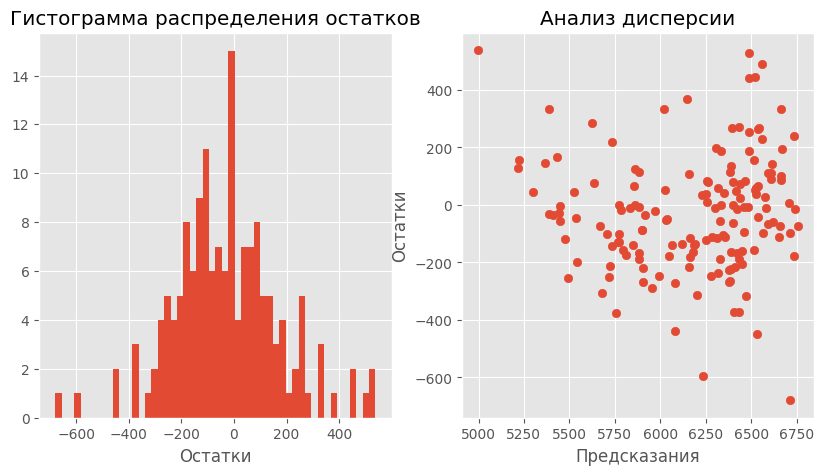

In [61]:
residuals = y_test - predictions_1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_1, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()

- Остатки нормально распределены 

порода_РефлешнСоверинг     1.152029
вкус_молока_не вкусно      2.013548
тип_пастбища_Холмистое     3.035919
белок                      4.073049
сырой_протеин              8.603035
возраст_менее_2_лет        8.648011
эке                       12.334673
жирность                  12.831711
порода_папы_Соверин       17.126553
спо                       30.181472
dtype: float64

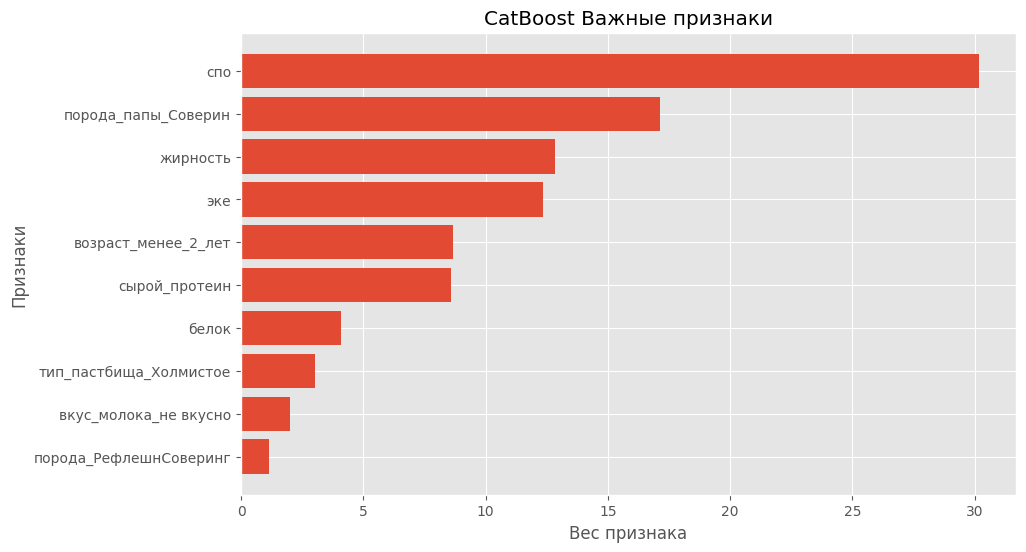

In [62]:
importances = model_cat.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train.columns).sort_values()
display(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Важные признаки')
plt.xlabel('Вес признака')
plt.ylabel('Признаки')
plt.show()

- Попробуем дать моделям больше информации.

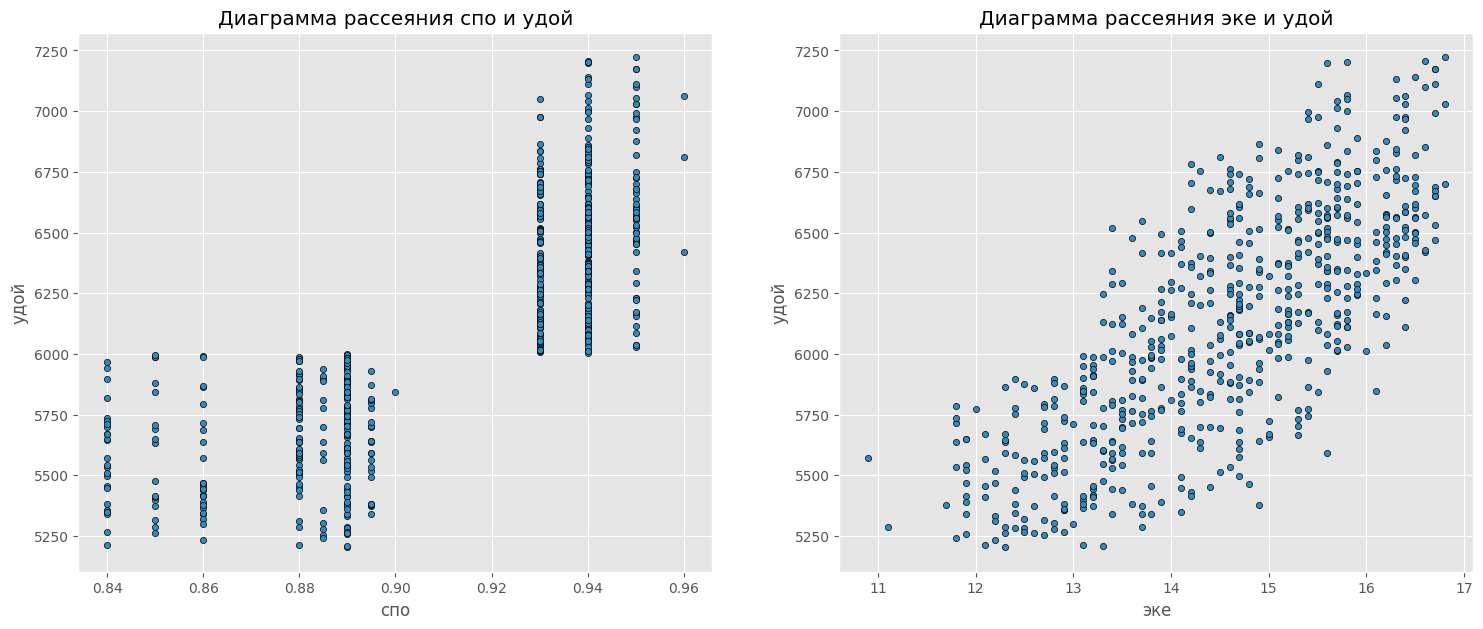

In [63]:
fig, axis = plt.subplots(1,2, figsize=(18,7))

ferma_main.plot(kind='scatter',       
               ax=axis[0], 
               x='спо',
               y='удой',
               xlabel = 'спо',
               ylabel = 'удой',
               title = 'Диаграмма рассеяния спо и удой',
               ec='black')


ferma_main.plot(kind='scatter',
                ax=axis[1],
                x='эке',
                y='удой',
                xlabel = 'эке',
                ylabel = 'удой',
                title = 'Диаграмма рассеяния эке и удой',
                ec='black')
plt.show()

- Переведем спо в категориальный признак.
- Из диаграммы рассеяния видно, что граница спо проходит в интервале от 0.9 до 0.93. Выберем середину и поделим спо на 2 категории: "менее_0.92" и "более_0.92".
- эке необходимо привести линейности.

In [64]:
ferma_main['спо_категории'] = ferma_main['спо'].apply(lambda x: 'менее_0.92' if x<0.91 else 'более_0.92')
ferma_main['эке_square'] = ferma_main['эке'].apply(lambda x: x**2)

ferma_main_copy = ferma_main.copy(deep=True)

print(f'Проверка размерности ferma_main ={ferma_main.shape}, ferma_main_copy = {ferma_main_copy.shape}')

Проверка размерности ferma_main =(628, 14), ferma_main_copy = (628, 14)


In [65]:
ferma_main_copy.columns

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст',
       'спо_категории', 'эке_square'],
      dtype='object')

In [66]:
columns_reper

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [67]:
X = ferma_main_copy.drop(columns = ['удой', 'id'])
y = ferma_main_copy['удой']
print(f'Проверка размерности X ={X.shape}, y = {y.shape}')

Проверка размерности X =(628, 12), y = (628,)


In [68]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 12)
(157, 12)
(471,)
(157,)


In [69]:
X_train, X_test, encoder, scaler = preprocess_df(X_train, 
                                                X_test,
                                                X.select_dtypes(include='object').columns,
                                                X.select_dtypes(include=[np.number]).columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Категориальные признаки Index(['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст',
       'спо_категории'],
      dtype='object')
Колличественные признаки Index(['эке', 'сырой_протеин', 'спо', 'жирность', 'белок', 'эке_square'], dtype='object')
(471, 12)
(157, 12)
(471,)
(157,)


In [70]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)
print(model_lr_1.intercept_)
print(model_lr_1.coef_)

6236.233467223501
[ -20.63698156   73.77425684 -245.8689218    54.47517292 -224.61605474
  147.64625302   58.99713505  159.06621792   27.3668496   -32.46670684]


In [71]:
#catboost из коробки
model_cat = CatBoostRegressor(verbose = 0)
model_cat.fit(X_train, y_train)
predictions_cat = model_cat.predict(X_test)

In [72]:
r2_lr = r2_score(y_test, predictions_2)
r2_cat = r2_score(y_test, predictions_cat)
print(f'R2 LinearRegression {r2_lr}, catboost {r2_cat}')

R2 LinearRegression 0.8178296782616663, catboost 0.8548254209660467


- R2 LinearRegression 0.81 , catboost 0.85
- Catboost без optuna tuning простой пакетной установкой эффективнее.
- LinearRegression не сильно увеличил свою производительность, но все же.

Попробуем новый подход.

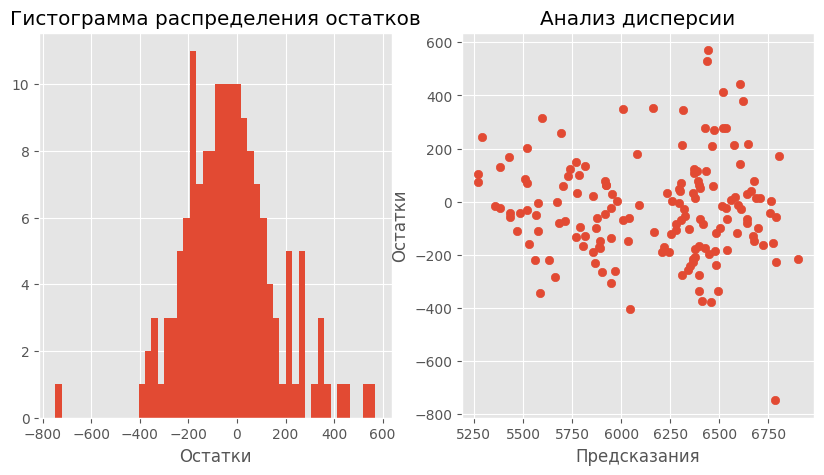

In [73]:
residuals = y_test - predictions_2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_2, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()

порода_РефлешнСоверинг       1.202951
вкус_молока_не вкусно        1.982343
тип_пастбища_Холмистое       2.894656
белок                        4.230333
эке                          5.870438
эке_square                   7.357582
сырой_протеин                8.615851
возраст_менее_2_лет          8.817009
жирность                    12.214320
спо_категории_менее_0.92    13.514698
спо                         15.368910
порода_папы_Соверин         17.930910
dtype: float64

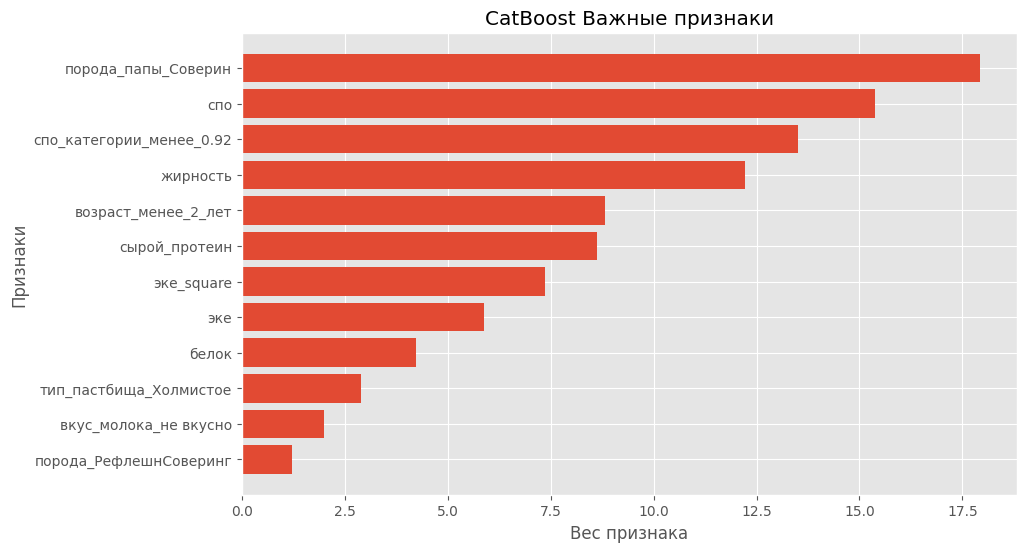

In [74]:
importances = model_cat.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train.columns).sort_values()
display(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Важные признаки')
plt.xlabel('Вес признака')
plt.ylabel('Признаки')
plt.show()

Объеденим датасеты

In [75]:
ferma_total = ferma_main.merge(ferma_dad, on='id', how='left')
ferma_total_copy = ferma_total.copy(deep = True)
ferma_total_copy.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_категории,эке_square,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.92,163.84,Барин


In [76]:
print('Датафрейм ferma_main')
display(ferma_total_copy.isna().sum())

Датафрейм ferma_main


id               0
удой             0
эке              0
сырой_протеин    0
спо              0
порода           0
тип_пастбища     0
порода_папы      0
жирность         0
белок            0
вкус_молока      0
возраст          0
спо_категории    0
эке_square       0
имя_папы         0
dtype: int64

In [77]:
ferma_total_copy.columns

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст',
       'спо_категории', 'эке_square', 'имя_папы'],
      dtype='object')

In [78]:
columns_reper

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [79]:
log_list = ['жирность', 'спо' , 'сырой_протеин', 'эке']

for i in log_list:
    ferma_total_copy[i+'_log'] = (ferma_total_copy[i]+1).transform(np.log)
    ferma_total_copy[i+'_log1'] = (ferma_total_copy[i]+1).transform(np.log1p)
    
print(f'Проверка размерности ferma_total_copy ={ferma_total_copy.shape}, ferma_total = {ferma_total.shape}')

Проверка размерности ferma_total_copy =(628, 23), ferma_total = (628, 15)


In [80]:
X = ferma_total_copy.drop(columns = ['удой', 'id', 'вкус_молока'])
y = ferma_total_copy['удой']

print(f'Проверка размерности X ={X.shape}, y = {y.shape}')

Проверка размерности X =(628, 20), y = (628,)


In [81]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 20)
(157, 20)
(471,)
(157,)


In [82]:
X_train, X_test, encoder, scaler = preprocess_df(X_train, 
                                                X_test,
                                                X.select_dtypes(include='object').columns,
                                                X.select_dtypes(include=[np.number]).columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Категориальные признаки Index(['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_категории',
       'имя_папы'],
      dtype='object')
Колличественные признаки Index(['эке', 'сырой_протеин', 'спо', 'жирность', 'белок', 'эке_square',
       'жирность_log', 'жирность_log1', 'спо_log', 'спо_log1',
       'сырой_протеин_log', 'сырой_протеин_log1', 'эке_log', 'эке_log1'],
      dtype='object')
(471, 22)
(157, 22)
(471,)
(157,)


In [83]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)
print(model_lr_1.intercept_)
print(model_lr_1.coef_)
#catboost из коробки
model_cat = CatBoostRegressor(verbose = 0)
model_cat.fit(X_train, y_train)
predictions_cat = model_cat.predict(X_test)

r2_lr = r2_score(y_test, predictions_3)
r2_cat = r2_score(y_test, predictions_cat)
print(f'R2 LinearRegression {r2_lr}, catboost {r2_cat}')

6236.233467223501
[ -20.63698156   73.77425684 -245.8689218    54.47517292 -224.61605474
  147.64625302   58.99713505  159.06621792   27.3668496   -32.46670684]
R2 LinearRegression 0.8195392904418911, catboost 0.8506061489616246


- Мы добились LinearRegression 82% эффективности

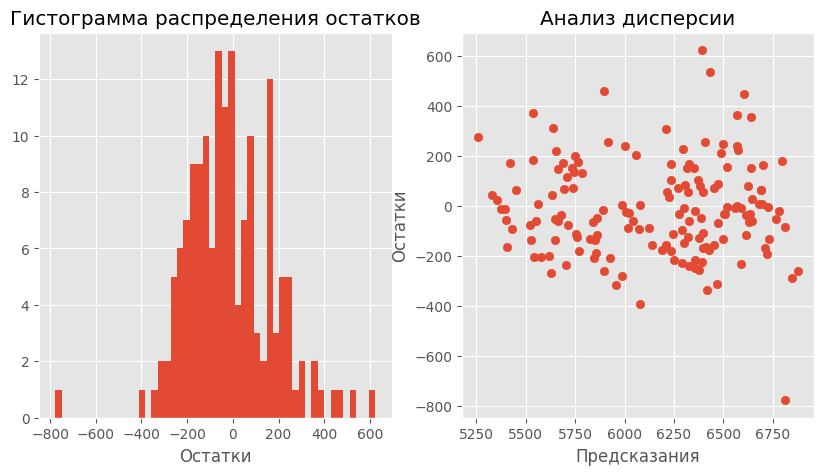

In [84]:
residuals = y_test - predictions_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_3, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()

- Логарифмирование очень помогает в регрессии
- Возведение в квадрат позволяет уйти он нелинейности
- Горячее кодирование позволяет рассматривать модель с другого ракурса
- Перевод из числовых в категориальные признаки бывает очень полезен в зависимости от контекста
- Добавление новых признаков очень благотворно влияет на решение задачи 

Три модели:
1. R2 LinearRegression 0.79 
2. R2 LinearRegression 0.81
3. R2 LinearRegression 0.82

Первая: Остатки имеют почти нормальное распределение со смещением влево. Модель завышает прогнозные значения. В целом выше или  ниже среднего.
Вторая: Имеет все теже атребуты, кроме только дисперсии, в целом моель более стабильна
Третья:  Имеет все теже атребуты, в целом мы просто уменьшили дисперсию.


Я бы предложил еще добавить Polynomial Features, PowerTransformer, QuantileTransformer и все доп признаки вместе с log подвел бы под PCA.

Update: 
- С использованием PCA, результаты ухудшились

Точности каждой модели по трем метрикам: MSE, MAE, RMSE

In [85]:
def metrics(a,b):
    print('MSE', mean_squared_error(a, b))
    print('RMSE',mean_squared_error(a, b, squared=False))
    print('MAE', mean_absolute_error(a, b))
    return

In [86]:
print('Первая модель')
metrics(y_test, predictions_1)
print()
print('Вторая')
metrics(y_test, predictions_2)
print()
print('Третья')
metrics(y_test, predictions_3)

Первая модель
MSE 41277.95420932113
RMSE 203.16976696674416
MAE 156.78473685741508

Вторая
MSE 37083.495077909414
RMSE 192.5707534334054
MAE 147.98213105850874

Третья
MSE 36735.47793513044
RMSE 191.6650148961214
MAE 148.7384821253796


- Из всех трех рассматриваемых третья модель имеет наименьшие показатели ошибок
- Готовим датафрейм.

In [87]:
st.t.interval(confidence=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

(6088.656355764041, 6220.269931304824)

- Фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%

In [88]:
eke = ferma_total_copy['эке'].mean()
spo = ferma_total_copy['спо'].mean()
sp = ferma_total_copy['сырой_протеин'].mean()
cow_buy['эке'] = eke * 1.05
cow_buy['сырой_протеин'] = sp * 1.05
cow_buy['спо'] = spo * 1.05

In [89]:
cow_buy_copy = cow_buy.copy()
print(cow_buy_copy.shape, cow_buy.shape)

(16, 10) (16, 10)


In [90]:
cow_buy_copy.head()

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [91]:
log_list = ['жирность', 'спо' , 'сырой_протеин', 'эке']

for i in log_list:
    cow_buy_copy[i+'_log'] = (cow_buy_copy[i]+1).transform(np.log)
    cow_buy_copy[i+'_log1'] = (cow_buy_copy[i]+1).transform(np.log1p)
    
cow_buy_copy['спо_категории'] = cow_buy['спо'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
cow_buy_copy['эке_square'] = cow_buy['эке'].apply(lambda x: x**2)
print(cow_buy_copy.shape)

(16, 20)


In [92]:
print('Размерность идентична?',len(cow_buy_copy.columns),len(ferma_total_copy.drop(columns = ['удой', 
                                                                                              'id',
                                                                                              'вкус_молока'
                                                                                             ]).columns))

Размерность идентична? 20 20


In [93]:
list_columns = ferma_total_copy.drop(columns = ['удой', 'id', 'вкус_молока']).columns
list_columns

Index(['эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища', 'порода_папы',
       'жирность', 'белок', 'возраст', 'спо_категории', 'эке_square',
       'имя_папы', 'жирность_log', 'жирность_log1', 'спо_log', 'спо_log1',
       'сырой_протеин_log', 'сырой_протеин_log1', 'эке_log', 'эке_log1'],
      dtype='object')

In [94]:
cow_buy_copy = cow_buy_copy[list_columns]
cow_buy_copy.shape

(16, 20)

In [95]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cat_col_names = cow_buy_copy.select_dtypes(include='object').columns
print('Категориальные признаки',cat_col_names)
encoder = load(open('encoder.pkl', 'rb'))
cow_buy_copy_ohe = encoder.transform(cow_buy_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

cow_buy_copy_ohe = pd.DataFrame(cow_buy_copy_ohe, columns=encoder_col_names)

num_col_names = cow_buy_copy.select_dtypes(include=[np.number]).columns
print('Колличественные признаки',num_col_names)
scaler = StandardScaler()
scaler = load(open('scaler.pkl', 'rb'))
cow_buy_copy_scaled = scaler.transform(cow_buy_copy[num_col_names])

cow_buy_copy_scaled = pd.DataFrame(cow_buy_copy_scaled, columns=num_col_names)
cow_buy_copy = pd.concat([cow_buy_copy_ohe, cow_buy_copy_scaled], axis=1)

Категориальные признаки Index(['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_категории',
       'имя_папы'],
      dtype='object')
Колличественные признаки Index(['эке', 'сырой_протеин', 'спо', 'жирность', 'белок', 'эке_square',
       'жирность_log', 'жирность_log1', 'спо_log', 'спо_log1',
       'сырой_протеин_log', 'сырой_протеин_log1', 'эке_log', 'эке_log1'],
      dtype='object')


In [96]:
predictions_cow_buy_copy = model_lr_3.predict(cow_buy_copy)
cow_buy['удой(кг)'] = predictions_cow_buy_copy
cow_buy.head(5)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,удой(кг)
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6523.989762
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6118.775848
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6165.994667
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6620.783246
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6518.554970


In [97]:
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
жирность,16.0,3.571875,1.416201e-01,3.340000,3.415000,3.585000,3.692500,3.770000
белок,16.0,3.068250,1.126351e-02,3.046000,3.059500,3.073500,3.076750,3.081000
эке,16.0,15.276162,5.503840e-15,15.276162,15.276162,15.276162,15.276162,15.276162
сырой_протеин,16.0,2019.947532,0.000000e+00,2019.947532,2019.947532,2019.947532,2019.947532,2019.947532
спо,16.0,0.958744,3.439900e-16,0.958744,0.958744,0.958744,0.958744,0.958744
удой(кг),16.0,6475.942271,2.713550e+02,5951.293752,6334.974052,6521.147422,6631.753634,7012.363562


- В результате проделанной работы был спрогнозирован годовой удой продаваемых коров, который варьируется от 5951.29 до 7012.36 кг. 
- Выявили лучшую модель из трех на валидационной выборке, доверительный интервал = (6088.656355764041, 6220.269931304824)

##  <a id="title8">Обучение модели логистической регрессии

In [98]:
ferma_total.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_категории,эке_square,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.92,163.84,Барин


In [99]:
ferma_total.shape

(628, 15)

In [100]:
ferma_total_copy = ferma_total.copy(deep = True)

ferma_total_copy['спо_категории'] = ferma_total_copy['спо'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
ferma_total_copy['эке_square'] = ferma_total_copy['эке'].apply(lambda x: x**2)

for i in log_list:
    ferma_total_copy[i+'_log'] = (ferma_total_copy[i]+1).transform(np.log)
    ferma_total_copy[i+'_log1'] = (ferma_total_copy[i]+1).transform(np.log1p)

In [101]:
ferma_total_copy['вкус_молока'].value_counts()

вкус_молока
вкусно       370
не вкусно    258
Name: count, dtype: int64

In [102]:
X = ferma_total_copy.drop(columns = ['удой', 'id','вкус_молока'])
y = ferma_total_copy['вкус_молока']

print(f'Проверка размерности X ={X.shape}, y = {y.shape}')

Проверка размерности X =(628, 20), y = (628,)


- Добавим подкатегорию вкусно / не вкусно int, можно через Labelencoder()
- Получаеться бинарная класификация

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
y_train = y_train.map({'не вкусно': 0, 'вкусно': 1}).astype(int)
y_test = y_test.map({'не вкусно': 0, 'вкусно': 1}).astype(int)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 20)
(157, 20)
(471,)
(157,)


In [104]:
X_train, X_test, encoder, scaler = preprocess_df(X_train, 
                                                X_test,
                                                X.select_dtypes(include='object').columns,
                                                X.select_dtypes(include=[np.number]).columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Категориальные признаки Index(['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_категории',
       'имя_папы'],
      dtype='object')
Колличественные признаки Index(['эке', 'сырой_протеин', 'спо', 'жирность', 'белок', 'эке_square',
       'жирность_log', 'жирность_log1', 'спо_log', 'спо_log1',
       'сырой_протеин_log', 'сырой_протеин_log1', 'эке_log', 'эке_log1'],
      dtype='object')
(471, 22)
(157, 22)
(471,)
(157,)


In [105]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(564, 22)
(157, 22)
(564,)
(157,)


In [106]:
def metrics_clf(a,b):
    print('Accuracy', accuracy_score(a, b))
    print('Precision',precision_score(a, b))
    print('Recall', recall_score(a, b))
    print('f1', f1_score(a, b))
    return

In [107]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_cat = CatBoostClassifier(verbose = 0)
clf_cat.fit(X_train, y_train)
y_pred_cat = clf_cat.predict(X_test)

print('LogisticRegression')
metrics_clf(y_test, y_pred)
print()
print('CatBoostClassifier')
metrics_clf(y_test, y_pred_cat)

LogisticRegression
Accuracy 0.7579617834394905
Precision 0.7551020408163265
Recall 0.8409090909090909
f1 0.7956989247311828

CatBoostClassifier
Accuracy 0.7452229299363057
Precision 0.7666666666666667
Recall 0.7840909090909091
f1 0.7752808988764045


In [108]:
confusion_matrix(y_test, y_pred)

array([[45, 24],
       [14, 74]], dtype=int64)

Update:
- покрасивей

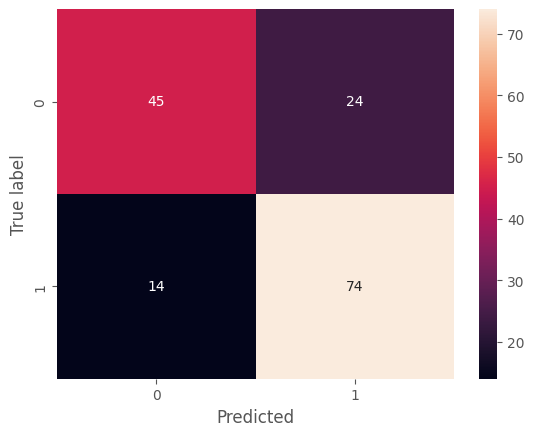

In [109]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted');

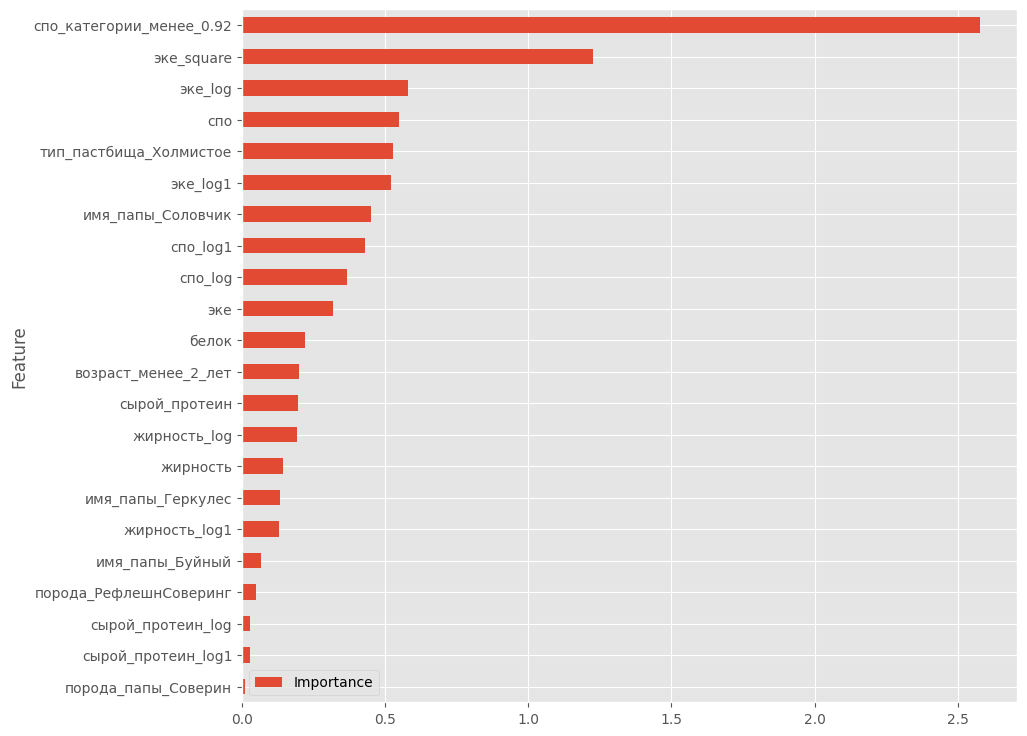

In [110]:
coefficients = clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 9))
plt.show()

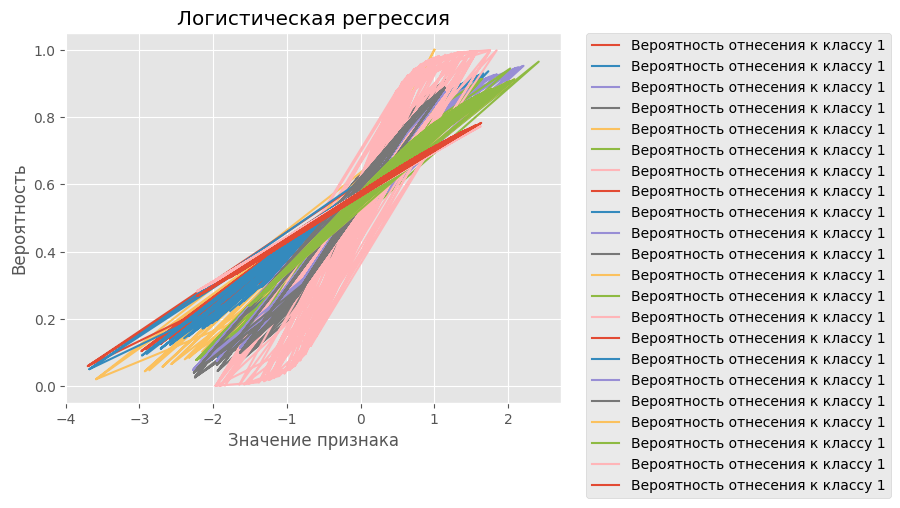

In [111]:
coef = np.exp(clf.coef_[0])
intercept = np.exp(clf.intercept_[0])

def logistic_function(x):
    return 1 / (1 + np.exp(-(coef*x + intercept)))

# Вычисляем предсказанные вероятности
y_proba = logistic_function(X_test)

# Рисуем график
plt.plot(X_test, y_proba, label='Вероятность отнесения к классу 1')
plt.xlabel('Значение признака')
plt.ylabel('Вероятность')
plt.title('Логистическая регрессия')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

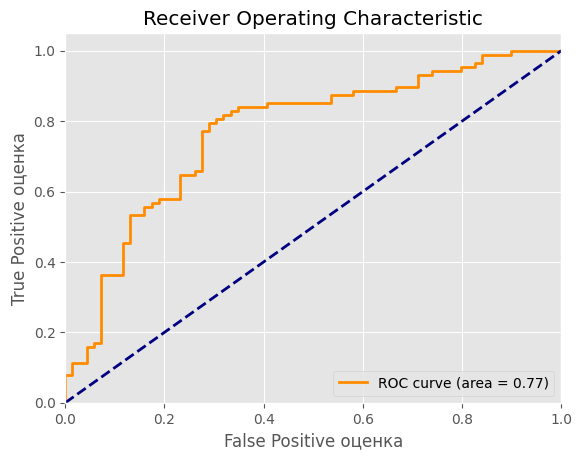

In [112]:
y_scores = clf.predict_proba(X_test)[:, 1]

# Вычисляем значения FPR и TPR для различных пороговых значений
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Вычисляем площадь под ROC кривой (AUC)
roc_auc = auc(fpr, tpr)

# Рисуем ROC кривую
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive оценка')
plt.ylabel('True Positive оценка')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- 0.78 наша площадь под кривой

- в 49 случаях модель отнесла вкусное молоко к категории 'вкусно' (0 == 0),
- в 24 случаях модель неправильно отнесла невкусное молоко к категории 'вкусно' (0 != 1);
- в 26 случаях модель неправильно относла вкусное молоко к категории 'не вкусно' (1 != 0);
- в 54 случаях модель отнесла невкусное молоко к категории 'не вкусно';

Тшчность мала, зато ошибки первого и второго рода достаточно низки.

In [113]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 4,endpoint=False)]
print(thresholds)

[0.5, 0.62, 0.75, 0.88]


In [114]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
display(data.head())
for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))

,y_valid,y_proba,y_pred_0.5,y_pred_0.62,y_pred_0.75,y_pred_0.88
0,1,0.503627,1,0,0,0
1,1,0.629154,1,1,0,0
2,1,0.310203,0,0,0,0
3,0,0.331239,0,0,0,0
4,1,0.737779,1,1,0,0


y_pred_0.5 Recall =  0.8409090909090909
y_pred_0.5 Precision =  0.7551020408163265
y_pred_0.62 Recall =  0.5113636363636364
y_pred_0.62 Precision =  0.8333333333333334
y_pred_0.75 Recall =  0.07954545454545454
y_pred_0.75 Precision =  0.875
y_pred_0.88 Recall =  0.0
y_pred_0.88 Precision =  0.0


- thresholds = 0.3 имеет Recall =  0.95
- thresholds = 0.82 Precision =  1.0
- Порог принятия решений можно представить как линию, на одной стороне которой будет одно значение, а на другой иное.
- нам надо вкусно т.е. 1, а значит Precision, порог будем поднимать

In [115]:
thresholds = [0.6, 0.7, 0.8, 0.83, 0.84, 0.85, 0.86]

y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
display(data.head())
for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))   

,y_valid,y_proba,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.83,y_pred_0.84,y_pred_0.85,y_pred_0.86
0,1,0.503627,0,0,0,0,0,0,0
1,1,0.629154,1,0,0,0,0,0,0
2,1,0.310203,0,0,0,0,0,0,0
3,0,0.331239,0,0,0,0,0,0,0
4,1,0.737779,1,1,0,0,0,0,0


y_pred_0.6 Recall =  0.5568181818181818
y_pred_0.6 Precision =  0.8032786885245902
y_pred_0.7 Recall =  0.2840909090909091
y_pred_0.7 Precision =  0.8333333333333334
y_pred_0.8 Recall =  0.045454545454545456
y_pred_0.8 Precision =  1.0
y_pred_0.83 Recall =  0.011363636363636364
y_pred_0.83 Precision =  1.0
y_pred_0.84 Recall =  0.011363636363636364
y_pred_0.84 Precision =  1.0
y_pred_0.85 Recall =  0.0
y_pred_0.85 Precision =  0.0
y_pred_0.86 Recall =  0.0
y_pred_0.86 Precision =  0.0


- ближе 0.6-0.8

In [116]:
thresholds = [0.215, 0.22, 0.225, 0.23]

y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
display(data.head())
for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

,y_valid,y_proba,y_pred_0.215,y_pred_0.22,y_pred_0.225,y_pred_0.23
0,1,0.503627,1,1,1,1
1,1,0.629154,1,1,1,1
2,1,0.310203,1,1,1,1
3,0,0.331239,1,1,1,1
4,1,0.737779,1,1,1,1


y_pred_0.215 Recall =  0.9886363636363636
y_pred_0.22 Recall =  0.9886363636363636
y_pred_0.225 Recall =  0.9886363636363636
y_pred_0.23 Recall =  0.9886363636363636


- Нулевая ошибка второга рода thresholds={0.215 до 0.23}. По условию ошибка второго рода означает, что модель может присвоить 0, а на самом деле должна быть 1. 0 - молоко вкусное, 1 - молоко невкусное.

In [117]:
y_pred_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.65).astype(int) 

print('LogisticRegression')
metrics_clf(y_test, y_pred_threshold)

LogisticRegression
Accuracy 0.5923566878980892
Precision 0.8
Recall 0.36363636363636365
f1 0.5


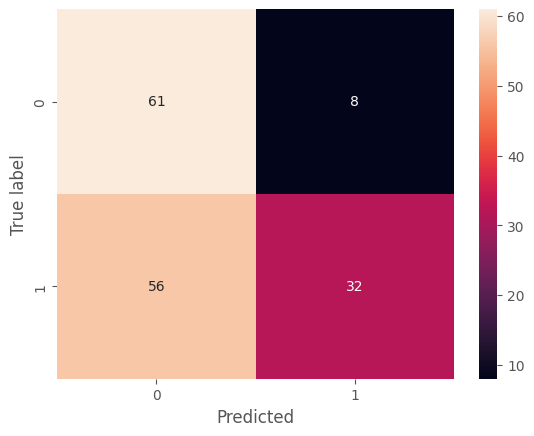

In [118]:
sns.heatmap(confusion_matrix(y_test, y_pred_threshold), annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

- Точность не большая
- Но ошибок по подбору стало меньше

In [119]:
cow_buy_copy = cow_buy.copy(deep = True)
cow_buy_copy.head()

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,удой(кг)
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6523.989762
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6118.775848
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6165.994667
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6620.783246
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6518.554970


In [120]:
cow_buy_copy['спо_категории'] = cow_buy['спо'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
cow_buy_copy['эке_square'] = cow_buy['эке'].apply(lambda x: x**2)

for i in log_list:
    cow_buy_copy[i+'_log'] = (cow_buy_copy[i]+1).transform(np.log)
    cow_buy_copy[i+'_log1'] = (cow_buy_copy[i]+1).transform(np.log1p)
    
cow_buy_copy.shape

(16, 21)

In [121]:
list_columns = ferma_total_copy.drop(columns = ['удой', 'id', 'вкус_молока']).columns
list_columns

Index(['эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища', 'порода_папы',
       'жирность', 'белок', 'возраст', 'спо_категории', 'эке_square',
       'имя_папы', 'жирность_log', 'жирность_log1', 'спо_log', 'спо_log1',
       'сырой_протеин_log', 'сырой_протеин_log1', 'эке_log', 'эке_log1'],
      dtype='object')

In [122]:
cow_buy_copy = cow_buy_copy[list_columns]
cow_buy_copy.shape

(16, 20)

In [123]:
encoder = load(open('encoder.pkl', 'rb'))
cow_buy_copy_ohe = encoder.transform(cow_buy_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

cow_buy_copy_ohe = pd.DataFrame(cow_buy_copy_ohe, columns=encoder_col_names)


scaler = load(open('scaler.pkl', 'rb'))
cow_buy_copy_scaled = scaler.transform(cow_buy_copy[num_col_names])

cow_buy_copy_scaled = pd.DataFrame(cow_buy_copy_scaled, columns=num_col_names)
cow_buy_copy = pd.concat([cow_buy_copy_ohe, cow_buy_copy_scaled], axis=1)

In [125]:
taste_predict_milk = (clf.predict_proba(cow_buy_copy)[:, 1] >= 0.84).astype(int)
taste_predict_milk

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

- Есть прогноз
- Погоняв туда-сюда thresholds, пришел к выводу, что 0.60 до 0.80 оптимальный баланс между Accuracy, Precision, Recall

In [126]:
cow_buy['вкус_молока'] = taste_predict_milk
cow_buy['вероятности_вкуса_молока_не_вкусно'] = clf.predict_proba(cow_buy_copy)[:, 0]
cow_buy['вероятности_вкуса_молока_вкусно'] = clf.predict_proba(cow_buy_copy)[:, 1]
cow_buy['вкус_молока'] = cow_buy['вкус_молока'].map({0 :'не вкусно' , 1 : 'вкусно'}).astype(str)
cow_buy.head(5)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,удой(кг),вкус_молока,вероятности_вкуса_молока_не_вкусно,вероятности_вкуса_молока_вкусно
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6523.989762,не вкусно,0.192987,0.807013
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6118.775848,не вкусно,0.223155,0.776845
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6165.994667,не вкусно,0.285928,0.714072
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6620.783246,не вкусно,0.385082,0.614918
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6518.554970,не вкусно,0.312293,0.687707


In [127]:
to_buy = cow_buy.query('вкус_молока == "вкусно"')
print('Коллиество коров претендентов: ', to_buy.shape[0])

Коллиество коров претендентов:  1


## <a id="title9">Итоговые выводы

- Проверены данные на наличие пропусков и дубликатов, устранены все проблемы с данными.
- Проведен статистический анализ всех признаков. Выявлены интересные закономерности, выбросы, необычное распределение количественных признаков.
- Проведен корреляционный анализ признаков, составлена матрица.
Регрессия:
- Обучены три модели простой линейной регрессии, в сравнение приведены альтернативы (Catboost).
- Отобраны оптимальные признаки.
- Оценены качества каждой модели по трём метрикам: MSE, MAE, RMSE.(кроме целевой).
- Лучшей моделью спрогнозирован удой коров, которых фермер хочет купить.
Классификация:
- Подготовлены данные датасета.
- Построены матрицы ошибок.
- Проанализирована модель логистической регрессии.
- Сведена критичная ошибка к нулю: изменен порог принадлежности к классам.
- Спрогнозирован вкус молока коров, которых фермер хочет купить. 
- Предоставлен список коров.

Методы:
- применен smote, логарифмирование, оценивание признаков путем обучения данных на других моделях (выбран Catboost).
- Реализованы методы EDA (plt, sns и.т.д.)